# Wykorzystanie biblioteki DEAP w problemie optymalizacji parametrów klasyfikatorów oraz selekcji cech

### I Optymalizacja parametrów klasyfikatorów

In [1]:
# loading data
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv("ReplicatedAcousticFeatures-ParkinsonDatabase.csv",sep=',')

df.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,Delta0,Delta1,Delta2,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,0.017463,0.019660,0.021882,59.437966,60.736249,71.882864,77.626729,77.538042,0.250433,0.599346,0.005397,0.900404,1.319502,1.336201,1.302408,1.329085,1.284922,1.209225,1.239354,1.277002,1.332503,1.347470,1.367540,1.402141,1.393809,1.397874,1.372464,1.390298,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,0.013010,0.014097,0.016828,59.838895,62.655599,74.378669,79.989228,80.269783,0.271445,0.581242,0.075617,0.887042,1.215251,1.221557,1.265419,1.187177,1.256340,1.246375,1.283629,1.302498,1.308008,1.316527,1.370643,1.373966,1.344655,1.302399,1.347680,1.365750,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,0.011049,0.012683,0.013038,57.293808,61.858336,73.665297,78.930502,79.033510,0.203531,0.600759,0.005283,0.889399,1.426075,1.220701,1.344188,1.346296,1.339797,1.334447,1.391798,1.349621,1.349904,1.340463,1.362594,1.313769,1.277938,1.312889,1.352442,1.243385,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,0.014525,0.015696,0.018330,62.179573,68.678205,79.839984,84.367682,84.252430,0.261360,0.625216,0.030518,0.875984,1.495235,1.602983,1.572715,1.498323,1.561722,1.590510,1.626319,1.645811,1.666730,1.618487,1.493691,1.459040,1.383606,1.379629,1.217517,1.309647,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,0.006461,0.008385,0.011037,67.534024,74.976858,85.727420,91.033967,91.145189,0.222069,0.602493,0.035602,0.902206,1.516959,1.581687,1.542668,1.613747,1.501956,1.258557,1.385013,1.452518,1.498049,1.421549,1.557644,1.187218,1.576015,1.252247,1.577338,1.583072,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [2]:
# Preprocessing
y=df['Status']
df.drop('Status',axis=1,inplace=True)

df.drop('ID',axis=1,inplace=True)
df.drop('Recording',axis=1,inplace=True)

numberOfAtributtes= len(df.columns)
print(numberOfAtributtes)

45


In [3]:
# Classification using SVC with default parameters and 5x K-fold cross validation for all 45 features
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

mms = MinMaxScaler()
df_norm = mms.fit_transform(df)

clf = RandomForestClassifier()
scores = model_selection.cross_val_score(clf, df_norm, y, cv=5, scoring='accuracy', n_jobs=-1)
print(scores.mean())

0.7916666666666667


In [37]:
# Generationg new individual
import random
def parametersRFC(numberFeatures,icls):
    genome = list()
    
    # n_estimators
    n_estimators = random.randint(20, 200)
    genome.append(n_estimators)
    
    # criterion
    criterion = ['gini', 'entropy']
    genome.append(criterion[random.randint(0, 1)])
    
    # max_depth
    max_depth = None
    if random.uniform(0,1) > 0.5: max_deph = random.randint(1, 20)
    genome.append(max_depth)
    
    # min_samples_split
    min_samples_split = 2
    if random.uniform(0,1) > 0.5: min_samples_split = random.randint(3, 10)
    genome.append(min_samples_split)
    
    # min_samples_leaf
    min_samples_leaf = 2
    if random.uniform(0,1) > 0.5: min_samples_leaf = random.randint(2, 10)
    genome.append(min_samples_leaf)
    
    # min_weight_fraction_leaf
    min_weight_fraction_leaf = 0.0
    if random.uniform(0,1) > 0.5: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
    genome.append(min_weight_fraction_leaf)
    
    # max_features
    max_features = ['auto', 'sqrt', 'log2']
    genome.append(max_features[random.randint(0, 2)])

    return icls(genome)

In [38]:
# Mutation
def mutationRFC(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # n_estimators
        n_estimators = random.randint(20, 200)
        individual[numberParamer]=n_estimators
    elif numberParamer==1:    
        # criterion
        criterion = ['gini', 'entropy']
        individual[numberParamer]=criterion[random.randint(0, 1)]
    elif numberParamer==2: 
        # max_depth
        max_depth = None
        if random.uniform(0,1) > 0.2: max_deph = random.randint(1, 20)
        individual[numberParamer]=max_depth
    elif numberParamer==3: 
        # min_samples_split
        min_samples_split = 2
        if random.uniform(0,1) > 0.2: min_samples_split = random.randint(3, 10)
        individual[numberParamer]=min_samples_split
    elif numberParamer==4: 
        # min_samples_leaf
        min_samples_leaf = 2
        if random.uniform(0,1) > 0.2: min_samples_leaf = random.randint(2, 10)
        individual[numberParamer]=min_samples_leaf
    elif numberParamer==5: 
        # min_weight_fraction_leaf
        min_weight_fraction_leaf = 0.0
        if random.uniform(0,1) > 0.2: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
        individual[numberParamer]=min_weight_fraction_leaf
    elif numberParamer==6: 
        # max_features
        max_features = ['auto', 'sqrt', 'log2']
        individual[numberParamer]=max_features[random.randint(0, 2)]

In [39]:
# Fitness function
import math
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

def parametersFitnessRFC(y,df,numberOfAtributtes,individual):
    split=5
    cv = StratifiedKFold(n_splits=split)
    mms = MinMaxScaler()
    df_norm = mms.fit_transform(df)

    estimator = RandomForestClassifier(n_estimators=individual[0], criterion=individual[1], 
                                       max_depth=individual[2],min_samples_split=individual[3], 
                                       min_samples_leaf=individual[4], min_weight_fraction_leaf=individual[5], 
                                       max_features=individual[6], n_jobs=-1)
    resultSum = 0
    for train, test in cv.split(df_norm, y):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        tn, fp, fn, tp = metrics.confusion_matrix(expected, predicted).ravel()
        result = (tp + tn) / (tp + fp + tn + fn) #w oparciu o macierze pomyłek https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
        resultSum = resultSum + result #zbieramy wyniki z poszczególnych etapów walidacji krzyżowej

    return resultSum / split,

In [40]:
from deap import base, creator, tools
import random
from math import sin
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [41]:
sizePopulation = 20
probabilityMutation = 0.2
probabilityCrossover = 0.8
numberIteration = 10
numberElitism = 1

In [42]:
def configureDeap(fitness, parameters, mutation,
                  selection_param={'function':tools.selTournament, 'tournsize':3},
                 mate_params={'function':tools.cxTwoPoint},):
    
    creator.create('FitnessMax', base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox() 
    toolbox.register('individual', parameters, numberOfAtributtes, creator.Individual)
    toolbox.register('evaluate', fitness,y,df,numberOfAtributtes)
    toolbox.register('population', tools.initRepeat, list, toolbox.individual)
    toolbox.register('select', **selection_param)
    toolbox.register('mate', **mate_params)
    toolbox.register('mutate', mutation)

    return toolbox

In [43]:
def mutate(toolbox, offspring):
    for mutant in offspring:
        # mutation
        if random.random() < probabilityMutation:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    return offspring

In [44]:
def setIndividualFitnessValue(individuals, fitnesses):
    for ind, fit in zip(individuals, fitnesses):
        ind.fitness.value = [fit]
    return individuals

In [45]:
def initPopulation(toolbox):
    population = toolbox.population(n=sizePopulation)
    fitnesses = list(map(toolbox.evaluate, population))
    population = setIndividualFitnessValue(population, fitnesses)
    return population

In [46]:
def crossover(toolbox, offspring):
    # [::2] - gets only individuals with odd indexes
    # [1::2] -  gets only individuals with even indexes
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # crossover
        if random.random() < probabilityCrossover:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    return offspring

In [47]:
def evaluate(toolbox, offspring, verbose=0):
    # evaluate new individuals
    new_individuals = [ind for ind in offspring if not ind.fitness.valid]
    new_fitnesses = map(toolbox.evaluate, new_individuals)
    for ind, fit in zip(new_individuals, new_fitnesses):
        ind.fitness.values = fit
    
    if verbose>3:
        print('Ewaluated %i individuals'%len(new_individuals))
    return offspring

In [48]:
def getBestsForElitism(population):
    listElitism = []
    for x in range(0, numberElitism):
        listElitism.append(tools.selBest(population, 1)[0])
    return listElitism

In [49]:
def calculateStatistics(population,verbose=0):
    fits = [ind.fitness.values[0] for ind in population]
    length = len(population)
    mean = sum(fits)/length
    sum2 = sum(x*x for x in fits)
    std = abs(sum2/length-mean **2)**0.5
    if verbose>2:
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    return (mean, std)

In [50]:
def pickBestIndividual(population, verbose=0):
    best_ind = tools.selBest(population, 1)[0]
    if verbose>1:
        print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    return best_ind

In [51]:
def plotSimple(y_vals=[], label_y='y', label_x='x', title='plot', instance_info='no_info', save_location='./plots/'):
    filename = save_location + title+'_'+ instance_info +'.png'
    x_vals = [x for x in range(len(y_vals))]
    plt.plot(x_vals, y_vals)
    plt.title(title)
    plt.ylabel(label_y)
    plt.xlabel(label_x)
#     plt.savefig(filename)
    plt.show()
    plt.close()

In [52]:
def plotResults(stats):
    plotSimple([best[0].fitness.values[0] for best in stats], 'best', 'epoch', 'fitness(iteration)')
    plotSimple([best[1] for best in stats], 'mean', 'epoch', 'mean(iteration)')
    plotSimple([best[2] for best in stats], 'std', 'epoch', 'std(iteration)')
    plotSimple([best[3] for best in stats], 'duration', 'epoch', 'epoch_duration(iteration)')

In [53]:
def startOptimizationLoop(toolbox, population, elitism=False, verbose=0):
    stats = []
    g = 0
    while g < numberIteration:
        g = g + 1
        if verbose>0:
            print('-- Generation %i --' % g)
        start = timer()  
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        elite = getBestsForElitism(offspring) if elitism else []
        
        offspring = crossover(toolbox, offspring)
        offspring = mutate(toolbox, offspring)
        offspring = evaluate(toolbox, offspring)
        duration = timer()-start
        
        population[:] = offspring + elite

        mean, std = calculateStatistics(population, verbose)
        best_ind = pickBestIndividual(population, verbose)
        stats.append((best_ind, mean, std, duration))
    
    if verbose>-1:
        best_overall = pickBestIndividual(population, verbose)
        print('Best found individual: (x1,x2) =', best_overall, ', y =', best_overall.fitness.values[0])
    return stats

In [54]:
def run(fitness, parameters, mutation, selection, mate, elitism, verbose):
    toolbox = configureDeap(fitness, parameters, mutation, selection, mate)
    population = initPopulation(toolbox)
    stats = startOptimizationLoop(toolbox, population, elitism, verbose)
    plotResults(stats)

C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- Generation 1 --
  Min 0.775
  Max 0.8166666666666668
  Avg 0.7956249999999997
  Std 0.009361100807800324
Best individual is [55, 'entropy', None, 2, 7, 0.274244297519427, 'sqrt'], (0.8166666666666668,)
-- Generation 2 --
  Min 0.775
  Max 0.8125
  Avg 0.7958333333333333
  Std 0.009682458365530193
Best individual is [55, 'entropy', None, 2, 2, 0.0, 'auto'], (0.8125,)
-- Generation 3 --
  Min 0.7791666666666667
  Max 0.8125
  Avg 0.79625
  Std 0.008528953954367025
Best individual is [30, 'entropy', None, 2, 2, 0.0, 'sqrt'], (0.8125,)
-- Generation 4 --
  Min 0.7833333333333333
  Max 0.8166666666666668
  Avg 0.7989583333333334
  Std 0.011248070822241758
Best individual is [65, 'entropy', None, 9, 2, 0.0, 'log2'], (0.8166666666666668,)
-- Generation 5 --
  Min 0.7749999999999999
  Max 0.8125
  Avg 0.7922916666666667
  Std 0.011045596784840359
Best individual is [65, 'entropy', None, 10, 8, 0.0, 'auto'], (0.8125,)
-- Generation 6 --
  Min 0.775
  Max 0.8125
  Avg 0.7941666666666667
  Std

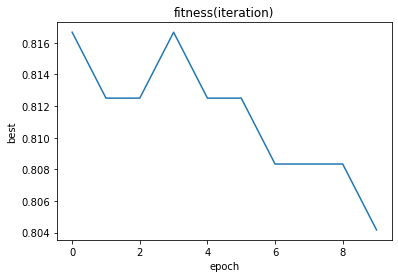

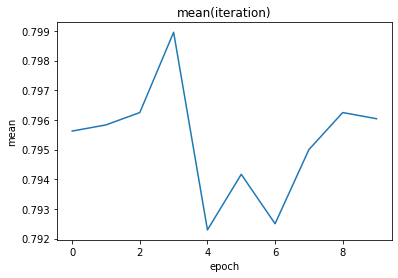

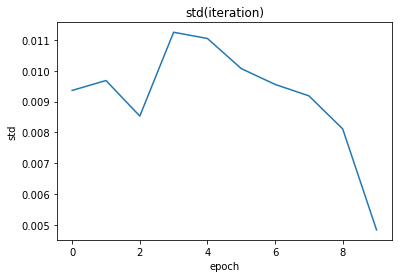

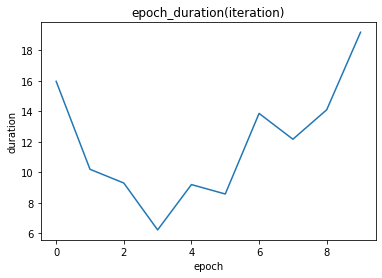

In [56]:
# scenario 0 (tournament, cxTwoPoint, with elitism):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersRFC
fitness=parametersFitnessRFC
mutation=mutationRFC
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)

### II Selekcja cech

In [32]:
# Generationg new individual
import random
def parametersFeaturesRFC(numberFeatures,icls):
    genome = list()
    
    # n_estimators
    n_estimators = random.randint(20, 200)
    genome.append(n_estimators)
    
    # criterion
    criterion = ['gini', 'entropy']
    genome.append(criterion[random.randint(0, 1)])

    # max_depth
    max_depth = None
    if random.uniform(0,1) > 0.5: max_deph = random.randint(1, 20)
    genome.append(max_depth)
    
    # min_samples_split
    min_samples_split = 2
    if random.uniform(0,1) > 0.5: min_samples_split = random.randint(3, 10)
    genome.append(min_samples_split)
    
    # min_samples_leaf
    min_samples_leaf = 2
    if random.uniform(0,1) > 0.5: min_samples_leaf = random.randint(2, 10)
    genome.append(min_samples_leaf)
    
    # min_weight_fraction_leaf
    min_weight_fraction_leaf = 0.0
    if random.uniform(0,1) > 0.5: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
    genome.append(min_weight_fraction_leaf)
    
    # max_features
    max_features = ['auto', 'sqrt', 'log2']
    genome.append(max_features[random.randint(0, 2)])
    
    # features
    for i in range(0,numberFeatures):
        genome.append(random.randint(0, 1))

    return icls(genome)

In [33]:
# Mutation
def mutationFeaturesRFC(individual):
    numberParamer= random.randint(0,len(individual)-1)
    if numberParamer==0:
        # n_estimators
        n_estimators = random.randint(20, 200)
        individual[numberParamer]=n_estimators
    elif numberParamer==1:    
        # criterion
        criterion = ['gini', 'entropy']
        individual[numberParamer]=criterion[random.randint(0, 1)]
    elif numberParamer==2: 
        # max_depth
        max_depth = None
        if random.uniform(0,1) > 0.2: max_deph = random.randint(1, 20)
        individual[numberParamer]=max_depth
    elif numberParamer==3: 
        # min_samples_split
        min_samples_split = 2
        if random.uniform(0,1) > 0.2: min_samples_split = random.randint(3, 10)
        individual[numberParamer]=min_samples_split
    elif numberParamer==4: 
        # min_samples_leaf
        min_samples_leaf = 2
        if random.uniform(0,1) > 0.2: min_samples_leaf = random.randint(2, 10)
        individual[numberParamer]=min_samples_leaf
    elif numberParamer==5: 
        # min_weight_fraction_leaf
        min_weight_fraction_leaf = 0.0
        if random.uniform(0,1) > 0.2: min_weight_fraction_leaf = random.uniform(0.0, 0.5)
        individual[numberParamer]=min_weight_fraction_leaf
    elif numberParamer==6: 
        # max_features
        max_features = ['auto', 'sqrt', 'log2']
        individual[numberParamer]=max_features[random.randint(0, 2)]
    else: #genetyczna selekcja cech
        if individual[numberParamer] == 0: 
            individual[numberParamer] = 1
        else:
            individual[numberParamer] = 0

In [59]:
# Fitness function
import math
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

def parametersFitnessFeaturesRFC(y,df,numberOfAtributtes,individual):
    split=5
    cv = StratifiedKFold(n_splits=split)
    
    listColumnsToDrop=[] #lista cech do usuniecia
    for i in range(numberOfAtributtes,len(individual)):
        if individual[i]==0: #gdy atrybut ma zero to usuwamy cechę
            listColumnsToDrop.append(i-numberOfAtributtes)

    dfSelectedFeatures=df.drop(df.columns[listColumnsToDrop], axis=1, inplace=False)
    
    mms = MinMaxScaler()
    df_norm = mms.fit_transform(dfSelectedFeatures)

    estimator = RandomForestClassifier(n_estimators=individual[0], criterion=individual[1], max_depth=individual[2], 
                                       min_samples_split=individual[3], min_samples_leaf=individual[4], 
                                       min_weight_fraction_leaf=individual[5], max_features=individual[6],
                                      n_jobs=-1)
    resultSum = 0
    for train, test in cv.split(df_norm, y):
        estimator.fit(df_norm[train], y[train])
        predicted = estimator.predict(df_norm[test])
        expected = y[test]
        tn, fp, fn, tp = metrics.confusion_matrix(expected, predicted).ravel()
        result = (tp + tn) / (tp + fp + tn + fn) #w oparciu o macierze pomyłek https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
        resultSum = resultSum + result #zbieramy wyniki z poszczególnych etapów walidacji krzyżowej

    return resultSum / split,

C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\dtms\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- Generation 1 --
  Min 0.775
  Max 0.8125
  Avg 0.7936666666666659
  Std 0.008629728977455904
Best individual is [65, 'gini', None, 2, 8, 0.0, 'log2', 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], (0.8125,)
-- Generation 2 --
  Min 0.775
  Max 0.8166666666666667
  Avg 0.7955833333333332
  Std 0.00847422562841063
Best individual is [96, 'entropy', None, 2, 2, 0.0, 'auto', 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], (0.8166666666666667,)
-- Generation 3 --
  Min 0.7666666666666667
  Max 0.8166666666666667
  Avg 0.7946249999999995
  Std 0.00890331944972708
Best individual is [96, 'entropy', None, 2, 2, 0.0, 'auto', 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], (0.8166666666666667,)
-- Generation 4 --
  Min 0.775
  Max 0

  Min 0.7833333333333333
  Max 0.8125
  Avg 0.7980416666666663
  Std 0.006781690013971745
Best individual is [173, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], (0.8125,)
-- Generation 28 --
  Min 0.7791666666666666
  Max 0.8125
  Avg 0.7980833333333328
  Std 0.008023836018134506
Best individual is [173, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], (0.8125,)
-- Generation 29 --
  Min 0.7791666666666666
  Max 0.8125
  Avg 0.798083333333333
  Std 0.00784883218496762
Best individual is [62, 'entropy', None, 6, 2, 0.0, 'sqrt', 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], (0.8125,)
-- Generation 30 --
  Min 0.7791666666666666
  Max 0.8166666666666667
  

  Min 0.7708333333333333
  Max 0.8125
  Avg 0.7966666666666662
  Std 0.007264831572683279
Best individual is [173, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], (0.8125,)
-- Generation 54 --
  Min 0.7833333333333333
  Max 0.8083333333333333
  Avg 0.7971249999999999
  Std 0.005912997688800932
Best individual is [173, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], (0.8083333333333333,)
-- Generation 55 --
  Min 0.7791666666666666
  Max 0.8125
  Avg 0.7970416666666661
  Std 0.006516405578881691
Best individual is [173, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], (0.8125,)
-- Generation 56 --
  Min 0.7791666666666666


  Min 0.7791666666666667
  Max 0.8208333333333334
  Avg 0.7988749999999999
  Std 0.008033242565246422
Best individual is [96, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], (0.8208333333333334,)
-- Generation 79 --
  Min 0.7833333333333333
  Max 0.8125
  Avg 0.7986666666666666
  Std 0.00674124947211713
Best individual is [173, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], (0.8125,)
-- Generation 80 --
  Min 0.7791666666666666
  Max 0.8166666666666668
  Avg 0.7980833333333334
  Std 0.007369701486536127
Best individual is [173, 'entropy', None, 9, 2, 0.0, 'sqrt', 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], (0.8166666666666668,)
-- Generation 81 --
  M

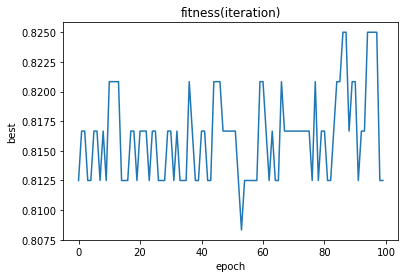

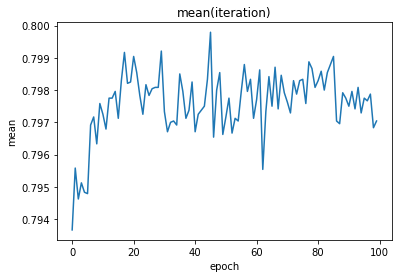

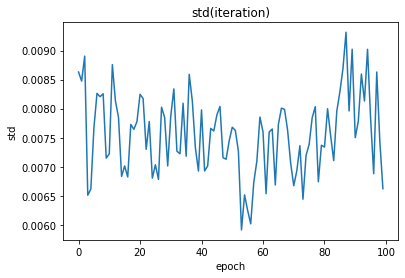

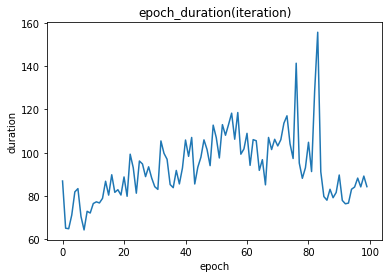

In [35]:
# scenario 0 (tournament, cxTwoPoint, with elitism, 100 epochs, 100 individuals in initpopulation):
selection={'function':tools.selTournament, 'tournsize':3} 
mate={'function':tools.cxTwoPoint}

parameters=parametersFeaturesRFC
fitness=parametersFitnessFeaturesRFC
mutation=mutationFeaturesRFC
elitism = False
verbose = 7
run(fitness, parameters, mutation, selection , mate , elitism, verbose)